#                                       Edoardo Antonaci 1234431

## Exercise 1

### • the number of particles emitted by a radioactive source during a fixed interval of time (∆t =10 s) follows a Poisson distribution on the parameter µ. The number of particles observed during consecutive time intervals is: 4, 1, 3, 1 and 3

### (a) suppose a uniform prior distribution for the parameter µ

### - determine and draw the posterior distribution for µ, given the data

### - evaluate mean, median and variance, both analytically and numerically in R

In [2]:
posterior<-function(likelihood,prior,interval_width){
    
    Z<-sum(likelihood*prior)*interval_width 
    post<-likelihood*prior/(Z)
    
    return(post)
}


uniform_jeffrey<-function(measures,mu,prior,alpha,interval_width,title){
    
    likelihood<-sapply(measures,FUN=dpois,lambda=mu)    
    
    print(likelihood)
    
    post<-0
    for (i in 1:length(measures)){

        post<-posterior(likelihood[,i],prior,interval_width)
        if(i<length(measures)){prior<-post}
    }

    alpha<-alpha

    rate<-length(measures)

    dgamma<-dgamma(mu, shape=alpha , rate=rate)
    dgamma_norm<-dgamma/sum(dgamma*interval_width)   

    cat("USING R NUMERICALY :\n\n")
    cat("Mean value is : ",mean(rgamma(10^6,shape=alpha,rate=rate) ),"\n")
    cat("Median value is : ",median(rgamma(10^6,shape=alpha,rate=rate) ),"\n")
    cat("Variance value is :",var(rgamma( 10^6,shape=alpha,rate=rate) ),"\n\n" )

    cat("USING R ANALITICALY :\n\n")
    cat("Mean value is : ",alpha/rate,"\n")
    cat("Median value is : ",qgamma(0.5,shape=alpha,rate=rate),"\n")
    cat("Variance value is :",alpha/(rate**2) )
    
    plot(mu,post/(sum(post)*interval_width),xaxs='r', yaxs='r', col='navy',xlab="µ",ylab="Posterior",main=title )
    lines(mu,dgamma_norm,col="coral3")
    grid(nx = NULL, ny = NULL, col = "darkgray", lty = "dotted")
    
    return(post)

}

In [3]:
measures<-c(4,1,3,1,3)                             #measures

mu<-seq(0.001,7,length=200)                          #mu=lambda*/\t lambda=rate 

interval_width<-(7-0.001)/(length(mu)-1)


               [,1]         [,2]         [,3]         [,4]         [,5]
  [1,] 4.162502e-14 0.0009990005 1.665001e-10 0.0009990005 1.665001e-10
  [2,] 6.878837e-08 0.0348859026 7.607050e-06 0.0348859026 7.607050e-06
  [3,] 1.005031e-06 0.0664293795 5.635026e-05 0.0664293795 5.635026e-05
  [4,] 4.820968e-06 0.0957509334 1.810479e-04 0.0957509334 1.810479e-04
  [5,] 1.457245e-05 0.1229664673 4.114087e-04 0.1229664673 4.114087e-04
  [6,] 3.415420e-05 0.1481865268 7.724824e-04 0.1481865268 7.724824e-04
  [7,] 6.811719e-05 0.1715165321 1.285078e-03 0.1715165321 1.285078e-03
  [8,] 1.215062e-04 0.1930570002 1.966152e-03 0.1930570002 1.966152e-03
  [9,] 1.997161e-04 0.2129037577 2.829173e-03 0.2129037577 2.829173e-03
 [10,] 3.083649e-04 0.2311481453 3.884452e-03 0.2311481453 3.884452e-03
 [11,] 4.531827e-04 0.2478772131 5.139458e-03 0.2478772131 5.139458e-03
 [12,] 6.399142e-04 0.2631739083 6.599104e-03 0.2631739083 6.599104e-03
 [13,] 8.742350e-04 0.2771172545 8.266016e-03 0.2771172545 8.266

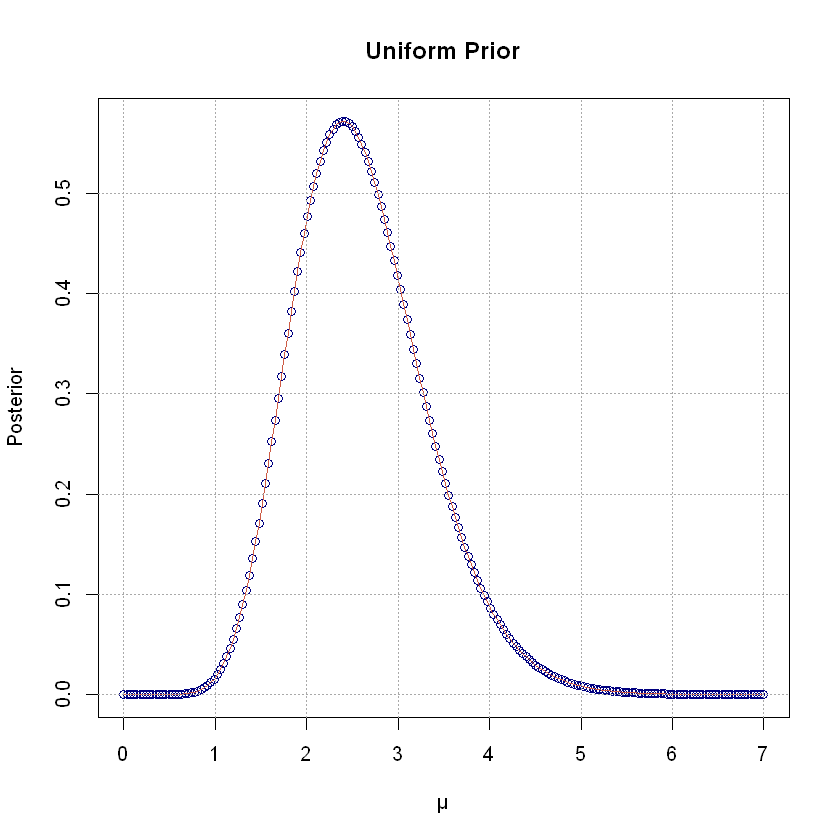

In [4]:
uniform<-rep(1/(7-0.001),length(mu) )                                      #prior
alpha_uniform<-sum(measures)+1

p.uniform=uniform_jeffrey(measures,mu,uniform,alpha_uniform,interval_width,"Uniform Prior")

### (b) suppose a Jeffrey’s prior for the parameter µ


### - determine and draw the posterior distribution for µ, given the data
### - evaluate mean, median and variance, both analytically and numerically in R

USING R NUMERICALY :

Mean value is :  2.500678 
Median value is :  2.435582 
Variance value is : 0.5017899 

USING R ANALITICALY :

Mean value is :  2.5 
Median value is :  2.433659 
Variance value is : 0.5

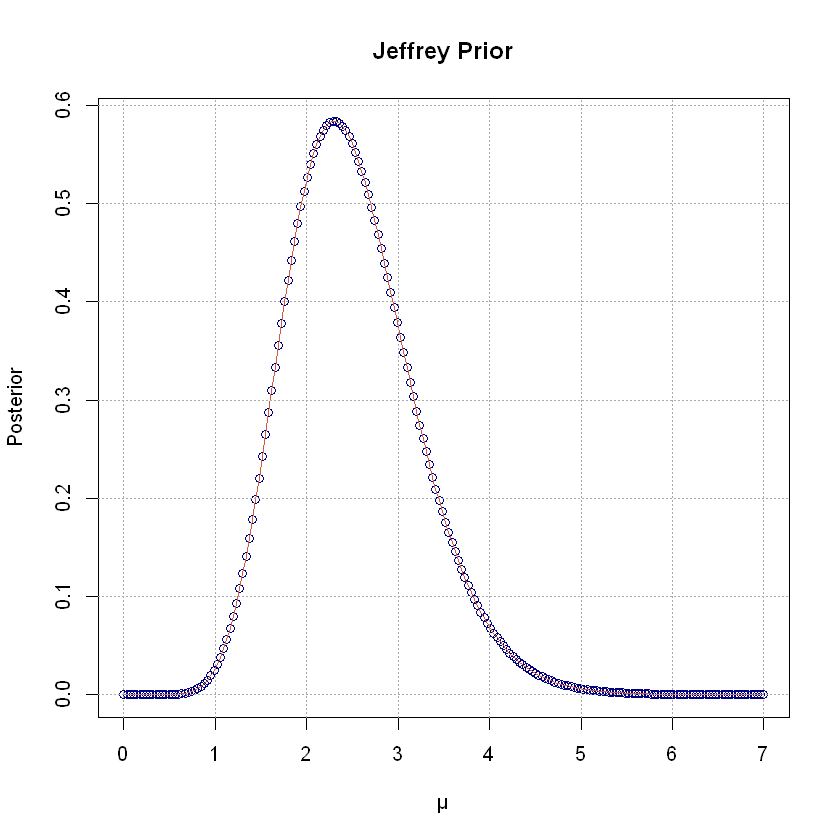

In [4]:

jeffrey<-1/sqrt(mu)                                  #Jeffrey's prior

alpha_jeffrey<-sum(measures)+1/2


p.jeffrey=uniform_jeffrey(measures,mu,jeffrey,alpha_jeffrey,interval_width,"Jeffrey Prior")


### (c) evaluate a 95% credibility interval for the results obtained with both priors. Compare the result with that obtained using a normal approximation for the posterior distribution, with the same mean and standard deviation


In [5]:
inf<-0.025
sup<-0.975
rate<-length(measures)
p.normal_uniform<-dnorm( mu,mean=2.6,sd=sqrt(0.52) ) 

p.normal_jeffrey<-dnorm( mu,mean=2.5,sd=sqrt(0.5) ) 

c.uniform <- c( qgamma(0.025,shape=alpha_uniform,rate=rate),qgamma(0.975,shape=alpha_uniform,rate=rate) )

c.jeffrey <- c( qgamma(0.025,shape=alpha_jeffrey,rate=rate),qgamma(0.975,shape=alpha_jeffrey,rate=rate) )

c.normal_uniform <- c(qnorm(0.025,mean=2.6,sd=(0.52)),qnorm(0.975,mean=2.6,sd=(0.52) ) )
c.normal_jeffrey <- c(qnorm(0.025,mean=2.5,sd=(0.5)),qnorm(0.975,mean=2.5,sd=(0.52) ) )


CL<-data.frame(
               "lower bound"=c(c.uniform[1],c.jeffrey[1],c.normal_uniform[1],c.normal_jeffrey[1]),
               "upper bound"=c(c.uniform[2],c.jeffrey[2],c.normal_uniform[2],c.normal_jeffrey[2]),
               row.names=c("Uniform","Jeffrey","Normal_Uniform","Normal_Jeffrey")
                )
CL

,lower.bound,upper.bound
Uniform,1.384390,4.192317
Jeffrey,1.311972,4.064647
Normal_Uniform,1.580819,3.619181
Normal_Jeffrey,1.520018,3.519181


## Exercise 2

### • given the problem of the lighthouse discussed last week, study the case in which both the position along the shore (α) and the distance out at sea (β) are unknown

In [12]:
#posterior with known beta
log_posterior_b <- function (x_k, beta) {
  Vectorize(function (alpha_hat) {
              sum( log((beta/pi) / (beta^2 + (x_k - alpha_hat)^2)) )
           })
}

alpha <- 1 # unkonwn true value
beta <- 1 # unkonwn true value

N       <- 10^4
theta_k <- runif(N,-pi/2,pi/2)

x_k     <- beta * tan(theta_k) + alpha

log_posterior <- log_posterior_b(x_k, beta)

posterior_shape <- function(xs, log_posterior) {
  log_alphas    <- log_posterior(xs)        # compute log posterior for a grid of values
  log_alpha_max <- max(log_alphas)            
  alphas <- exp(log_alphas - log_alpha_max) # subtract from L_max, and exponentiate
  alphas                                    #  then the max value will be 1
}

xs <- seq(0,2,len=1e3)


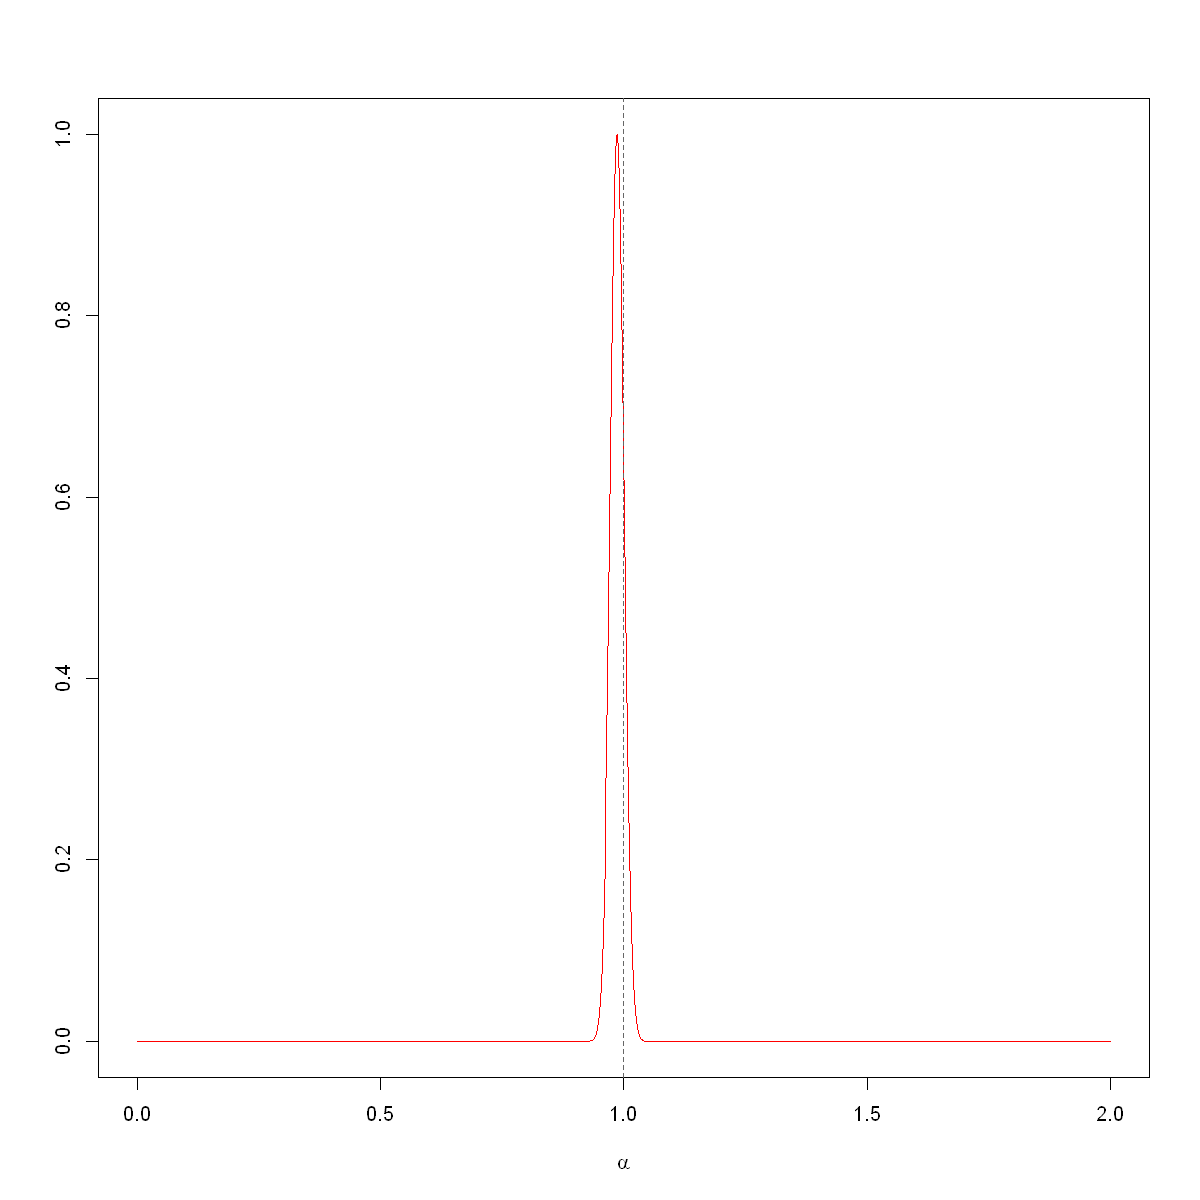

In [13]:
#if beta known
plot(xs, posterior_shape(xs, log_posterior),col="red",type="l", xlab=bquote(alpha), ylab="")
abline(v=alpha, col="grey40", lty=2)

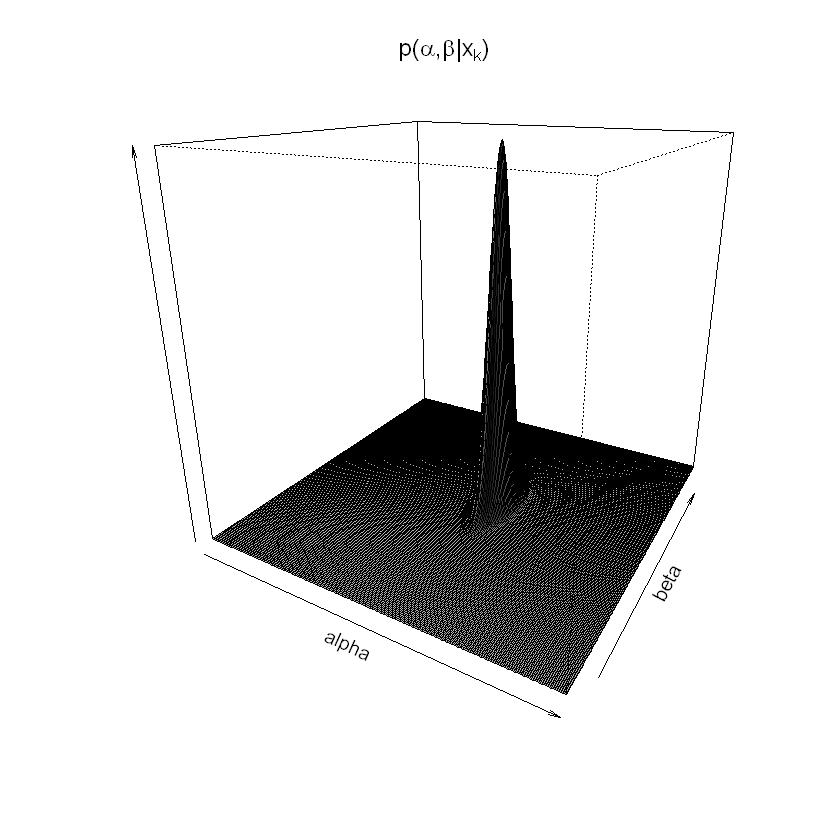

In [8]:
#unkn b

log_joint_posterior <- function (x_k, alfa, beta) {
  sum( log((beta/pi) / (beta^2 + (x_k - alfa)^2)) )
}

x_min <- -6; 
x_max <- 6; 
y_max <- 2
alphas <- seq(-0.5,2, 0.01)
betas  <- seq(0.5,1.5, 0.005)

f <- function(a,b) log_joint_posterior(x_k, a, b)

log_grid_values <- outer(alphas, betas, Vectorize(f))

grid_values <- matrix(posterior_shape(log_grid_values, log_posterior),
                      nrow=length(alphas), ncol=length(betas))

persp(alphas, betas , grid_values,
      xlab=bquote(alpha), ylab=bquote(beta), zlab="", 
      main="" , cex=0.7, lwd=0.1  , 
      xlim=c(-0.5,2), ylim=c(0.5,1.5), zlim=c(0,1),
      theta=30, phi=20, shade=0.5)
title(bquote(paste(p,"(",alpha,",",beta,"|",x[k],")")))

## Exercise 3

### • given the Signal over Background example discussed last week, analyze and discuss the following cases:

### (a) vary the sampling resolution of used to generate the data, keeping the same sampling range      
### xdat <- seq(from=-7*w, to=7*w, by=0.5*w)


### • Change the resolution w = {0.1, 0.25, 1, 2, 3}
### • Check the effect on the results

In [9]:


signal <- function(x, a, b, x0, w, t) {t * (a*exp(-(x-x0)^2/(2*w^2)) + b)}

graphs <- function(w,A.true,B.true,x0,Delta.t,title){

    par(mfrow=c(3,2),font.lab=4,cex.main=1.3,cex.lab=1.3,lwd=2,options(repr.plot.width=10, repr.plot.height=10),oma=c(2,0,2,0) )
    
    j<-0
    
    while(j<length(A.true)){
    
    j<-j+1
    i<-0
        while(i<length(w)){

        i<-i+1
        xdat <- seq(from=-7, to=7, by=0.5*w[i])                #position
        s.true <- signal(xdat , A.true[j] , B.true[j] , x0, w[i], Delta.t)     #aspected photon 
        ddat <- rpois(length(s.true), s.true)                            #photon sampled using s.true as rate

        xplot <- seq(from=min(xdat), to=max(xdat), by=0.05*w[i])         #for interpolation curve
        splot <- signal(xplot , A.true[j] , B.true[j] , x0, w[i], Delta.t)   

        plot(xplot , splot, type='l', xlab="x", ylab="Signal+Background",
             xlim=c(min(xdat),max(xdat)-0.1), ylim=range(c(splot, ddat )),main=paste(title[1]," = ",as.character(title[i+j]) ) )  #plot interpolation curve
        par(new=TRUE)
        xdat.off <- xdat -0.25
        plot(xdat.off, ddat , xlab='x', ylab='', type='s', col='firebrick3',
        lwd=2, xlim=c(min(xdat),max(xdat)-0.1), ylim=range(c(splot, ddat )) )

                        }
        
    if(length(w)>1){title(paste("A/B =",A.true/B.true),outer=TRUE,cex.main=2.5 )}
    else{title(paste("w =",w),outer=TRUE,cex.main=2.5 )}
                          }
                                                        } #end graphs


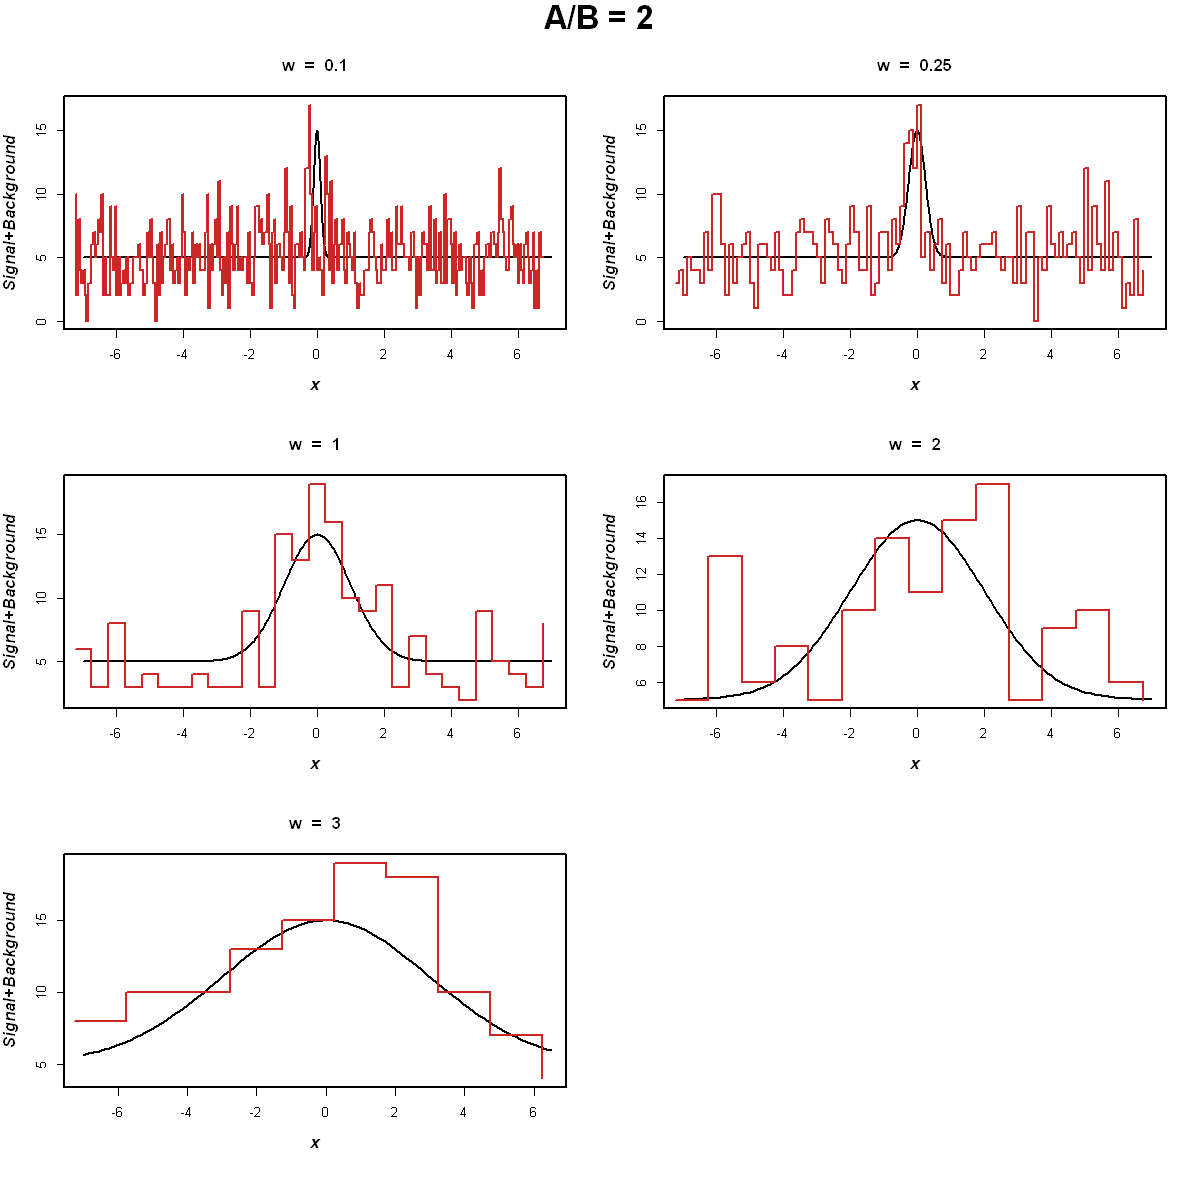

In [10]:
# Define model parameters
x0 <- 0 # Signal peak
w <- c(0.1,0.25,1,2,3) # Signal width
A.true <- 2 # Signal amplitude
B.true <- 1 # Background amplitude
Delta.t <- 5 # Exposure time
set.seed(27)

graphs(w,A.true,B.true,x0,Delta.t,as.character(c("w",w)) )

### (b) change the ratio A/B used to simulate the data (keeping both positive in accordance with the prior)
### • Check the effect on the results


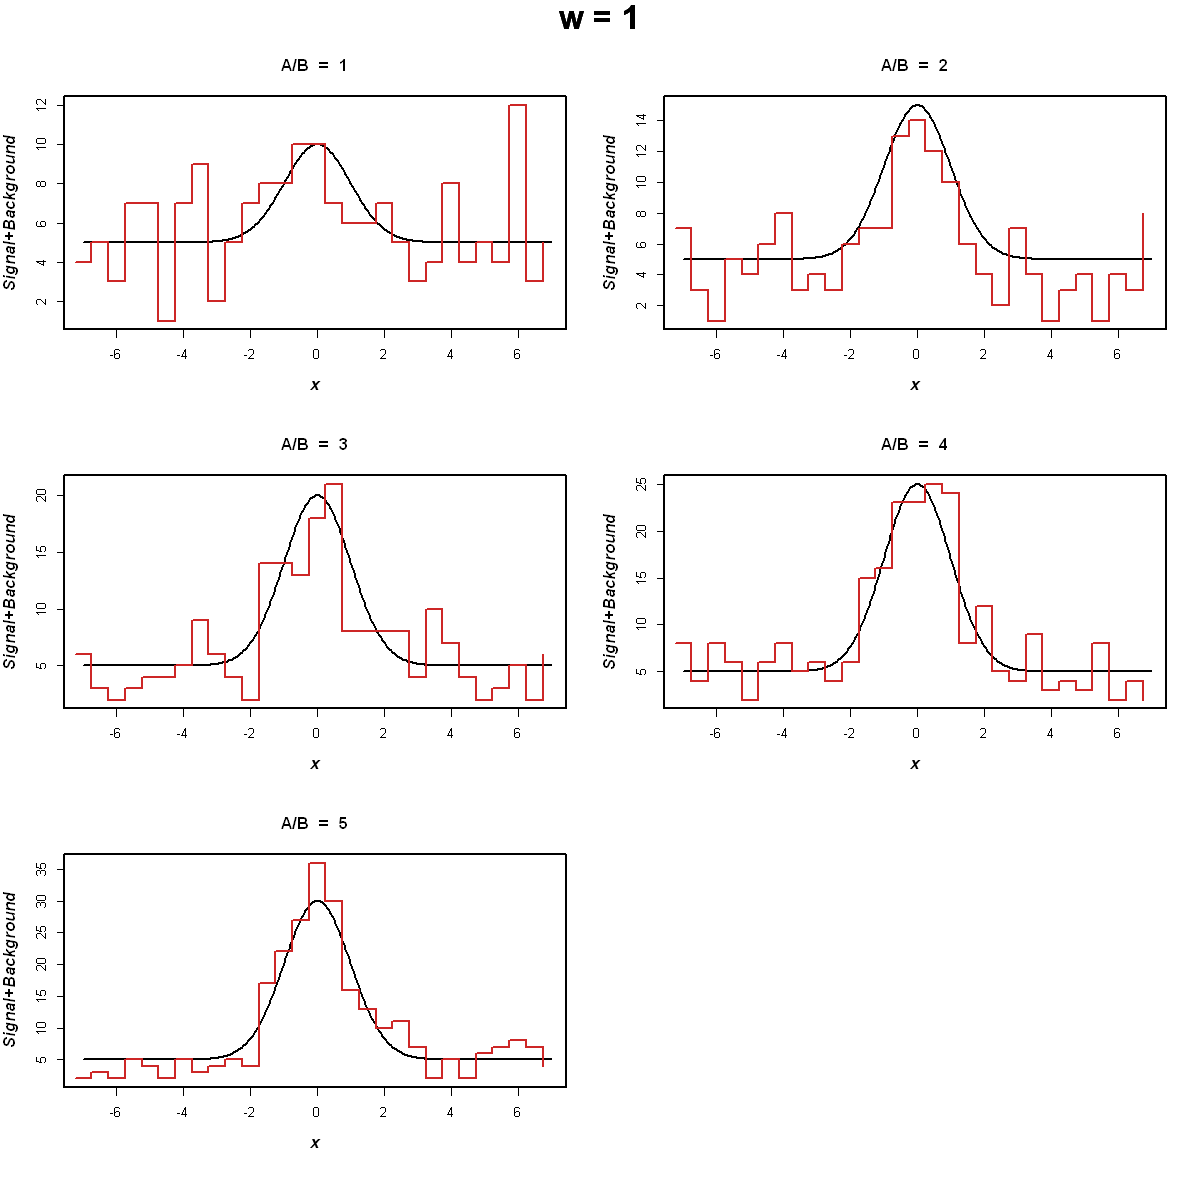

In [11]:
A.true<-1
B.true<-1

A_su_B<-c(1,2,3,4,5)         #A/B ratio
      
A.true<-A.true*A_su_B
B.true<-rep(B.true,length(A_su_B) )

graphs(w=1,A.true,B.true,x0,Delta.t,as.character(c("A/B",A_su_B)) )